In [1]:
#pip install pandas seaborn matplotlib gradio ollama


In [2]:
import pandas as pd
import seaborn as sns       
import matplotlib.pyplot as plt
url=r"D:\Naresh IT foundation\NIT_Python\EDA+LLM USING OLLAMA\titanic_ dataset_final.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


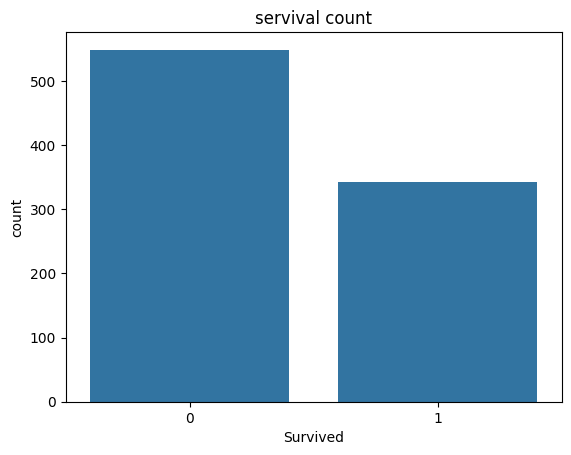

In [7]:
sns.countplot(x='Survived', data=df)
plt.title('servival count')
plt.show()

In [8]:
import ollama

def generate_insights(df_summery):
    prompt=f"please analuye the data summery and provide insights:\n\n,{df_summery}"
    response = ollama.chat(
        model="mistral",
        messages=[{"role":"user", "content": prompt}]
    )
    return response["message"]["content"]


summary = df.describe().to_string()
insights = generate_insights(summary)
print("\nInsights:\n", insights)
    



Insights:
  Title: Analysis of Titanic Passenger Data

Insights:

1. Total unique passengers: 891
2. Majority of the passengers (approximately 617 or 0.70 of total) did not survive.
3. The average age of the passengers was approximately 29.7 years old.
4. Most of the passengers belonged to the Second Class (Pclass = 2.31), suggesting a higher number of middle-class travelers on the ship.
5. The mean Fare is around 32.20, which could indicate an average price range for a second-class ticket in those times.
6. The standard deviation values suggest a wide spread of ages (14.53 years), social status (0.84), family size on the ship (1.10), and fares (49.69).
7. The minimum and maximum values provide context to these measures:
   - Age ranges from 0.42 to 80 years old.
   - Pclass ranges from 1.00 (First Class) to 3.00 (Third Class).
   - Fare values range from 0.00 (free passage) to 512.33.
8. Approximately one-quarter of the passengers were children traveling alone (SibSp=0, Parch=0), and

In [1]:

import gradio as gr
def eda_analysis(file):
    df=pd.read_csv(file.name)
    summary=df.describe().to_string()
    insights=generate_insights(summary)
    return insights

demo=gr.Interface(fn=eda_analysis,inputs="file",outputs="text",title="AI powered by EDA using mistral")
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
